In [1]:
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
from TicTacToe.human import Human as human
from TicTacToe.duel import duel, play_n_duels
from TicTacToe.agent_mc import AgentMC as amc
from TicTacToe.agent_mcts import AgentMCTS as amcts
from TicTacToe.agent_random import RandomAgent
from TicTacToe.human import Human

# Pruebas con Monte Carlo

Primero probaremos un agente que se entrena usando técnicas de Monte Carlo para estimar $q$ y $v_{\pi}$ . Nuestro agente de interés tendrá una política $\epsilon-$greedy y lo pondremos a competir contra un agente con política aleatoria, usaremos los parámetros $\epsilon = 0.2$ y $\gamma = 0.5$. En principio el agente no tiene ningún conocimiento de los estados ni de los valores.

In [2]:
player1 = RandomAgent()
player2 = amc()

Text(0, 0.5, 'Frecuencia relativa de juegos ganados ')

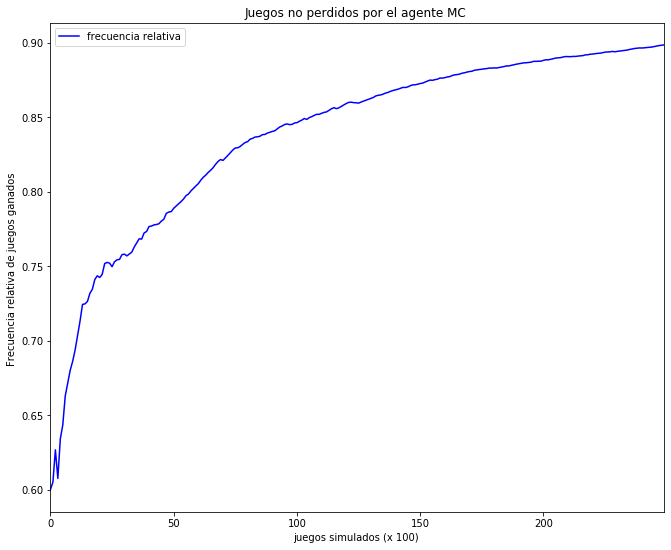

In [3]:
frec = play_n_duels(25000, player1, player2)
df = pd.DataFrame({ 'frecuencia relativa' :frec })

figsize(11, 9)
df.plot(title='Juegos no perdidos por el agente MC ',color='b')
plt.xlabel("juegos simulados (x 100) ")
plt.ylabel("Frecuencia relativa de juegos ganados ")

In [4]:
player2.wins

22086

Observamos que el agente de interés no tarda mucho en aprender a ganarle a la política aleatoria.

Ahora probaremos distintos parametros para comparar el aprendizaje entre distintos agentes contra la política aleatoria  

In [5]:
epsilons  = [0.01, 0.4, 0.8, 0.2, 0.6]
gammas = [0.02, 0.1, 0.5, 0.6, 0.01]
frecs = list()
best_player = player2
best_frec = frec[-1]
for eps, gam in zip(epsilons, gammas):
    player = amc()
    player.epsilon = eps
    player.gamma = gam 
    x = play_n_duels(25000, player1, player)
    frecs.append(x)
    if x[-1] > best_frec:
        best_frec = x[-1]
        best_player = player

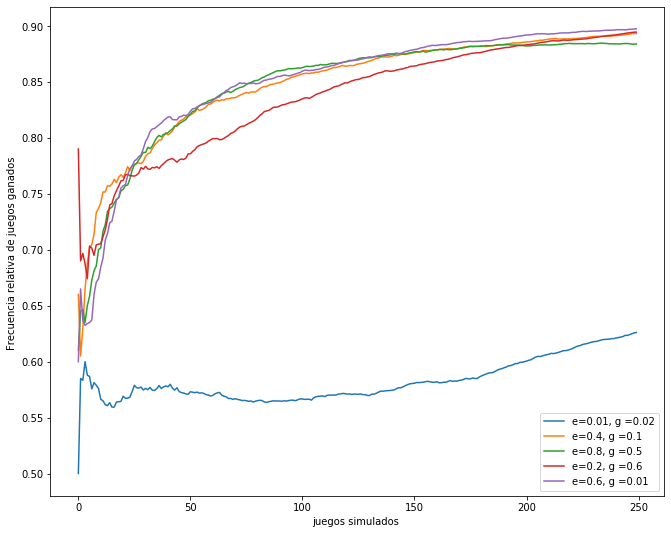

In [6]:
y = np.arange(250)
legends = list()

i = 0
for e, g in zip(epsilons, gammas): 
    plt.plot(y, frecs[i])
    legends.append('e='+str(e)+', g ='+str(g))
    i +=1
        
figsize(11, 9)
plt.legend(legends, loc='lower right')
plt.xlabel("juegos simulados ")
plt.ylabel("Frecuencia relativa de juegos ganados ")
plt.show()

# Pruebas Árbol de búsqueda Monte Carlo

Ahora, pondremos a competir a competir a un agente con los mismos parámetros que ``best_player`` sin ninguna información previa, es decir sin valores y también pondremos a competir a ``best_player`` contra un agente que aprende de acuerdo al método MCTS. Ambos competirán $15000$ juegos y compararemos el rendimiento de cada uno.

In [16]:
player3 = amc()
player3.epsilon = best_player.epsilon
player3.gamma = best_player.gamma

player4 = amcts()
player4.C = 2

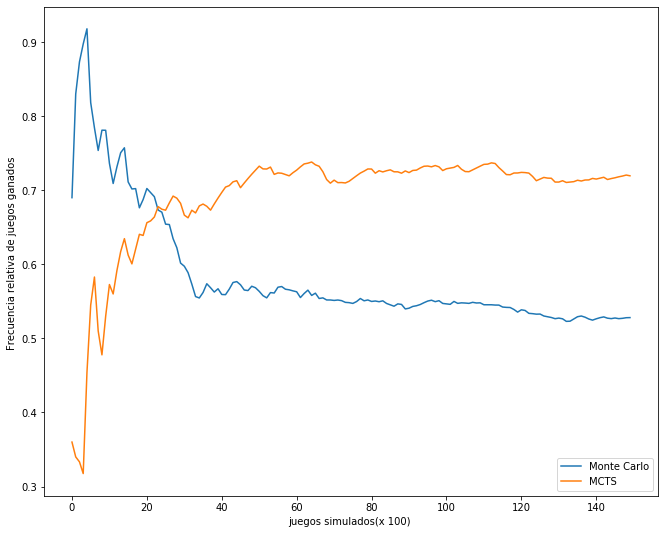

In [17]:
frec1 = play_n_duels(15000, best_player, player3)
frec2 = play_n_duels(15000, best_player, player4)
y = np.arange(150)

plt.plot(y, frec1)
plt.plot(y, frec2)
figsize(11, 9)

legends = ['Monte Carlo', 'MCTS']

plt.legend(legends, loc='lower right')
plt.xlabel("juegos simulados(x 100) ")
plt.ylabel("Frecuencia relativa de juegos ganados ")
plt.show()

In [9]:
player3.wins

6250

In [10]:
player4.wins

8580

Después de varias ejecuciones observamos que no hay un claro gandor, no simpre gana el mismo.

# Prueba con usuarios.
Se puede jugar contra cada uno de los agentes expuestos anteriormente.

In [11]:
human = Human()

## Usuario vs agente Monte Carlo

In [12]:
#duel(human, best_player, show=True)

## Agente Monte Carlo vs Usuario

In [13]:
#duel(human, best_player, show=True)

## Usuario vs Agente MCTS

In [14]:
#duel(human, player4, show=True)

## Agente MCTS vs Usuario

In [15]:
#duel(player4, human, show=True)